# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [64]:
#Import all the necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df

---***---

### Pregnancies ==> Preg
Number of times pregnant

### Glucose  ==> Plas???
Plasma glucose concentration a 2 hours in an oral glucose tolerance test

### BloodPressure  ==> Pres
Diastolic blood pressure (mm Hg)

### SkinThickness  ==> Skin
Triceps skin fold thickness (mm)

### Insulin  ==> Test???
2-Hour serum insulin (mu U/ml)

### BMI  ==> Mass
Body mass index (weight in kg/(height in m)^2)

### DiabetesPedigreeFunction  ==> Pedi
Diabetes pedigree function

### Age  ==> Age
Age (years)

### Outcome  ==> Class
Class variable (0 or 1) 268 of 768 are 1, the others are 0


In [65]:
pima_df = pd.read_csv("pima-indians-diabetes+(3).csv")

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [66]:
pima_df.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [67]:
print("Shape of the provided data set is: ", pima_df.shape)

print("---***---")

pima_df.info()

Shape of the provided data set is:  (768, 9)
---***---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Preg     768 non-null int64
Plas     768 non-null int64
Pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [68]:
# pima_df.isnull().sum()

In [69]:
# Columns that need 0s to be replaced:
    # Plas
    # Pres
    # Skin
    # Test
    # Mass
    # Pedi
    # Age

pima_df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [70]:
#X = pima_df.drop('class', axis=1)
#X = X.apply(lambda x: x.replace(0, x.mean()),axis=0)

pima_df['Plas'] = pima_df['Plas'].replace(0, pima_df['Plas'].median())

pima_df['Pres'] = pima_df['Pres'].replace(0, pima_df['Pres'].median())

pima_df['skin'] = pima_df['skin'].replace(0, pima_df['skin'].median())

pima_df['test'] = pima_df['test'].replace(0, pima_df['test'].median())

pima_df['mass'] = pima_df['mass'].replace(0, pima_df['mass'].median())

pima_df['pedi'] = pima_df['pedi'].replace(0, pima_df['pedi'].median())

pima_df['age'] = pima_df['age'].replace(0, pima_df['age'].median())

pima_df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [71]:
# for idx, col_name in enumerate(X_train.columns):
#    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

# Q5 Print the descriptive statistics of each & every column using describe() function

In [72]:
pima_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
Pres,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
skin,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
test,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
mass,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

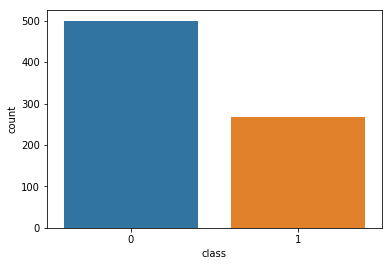

In [73]:
import seaborn as sns

sns.countplot(x='class', data=pima_df)

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


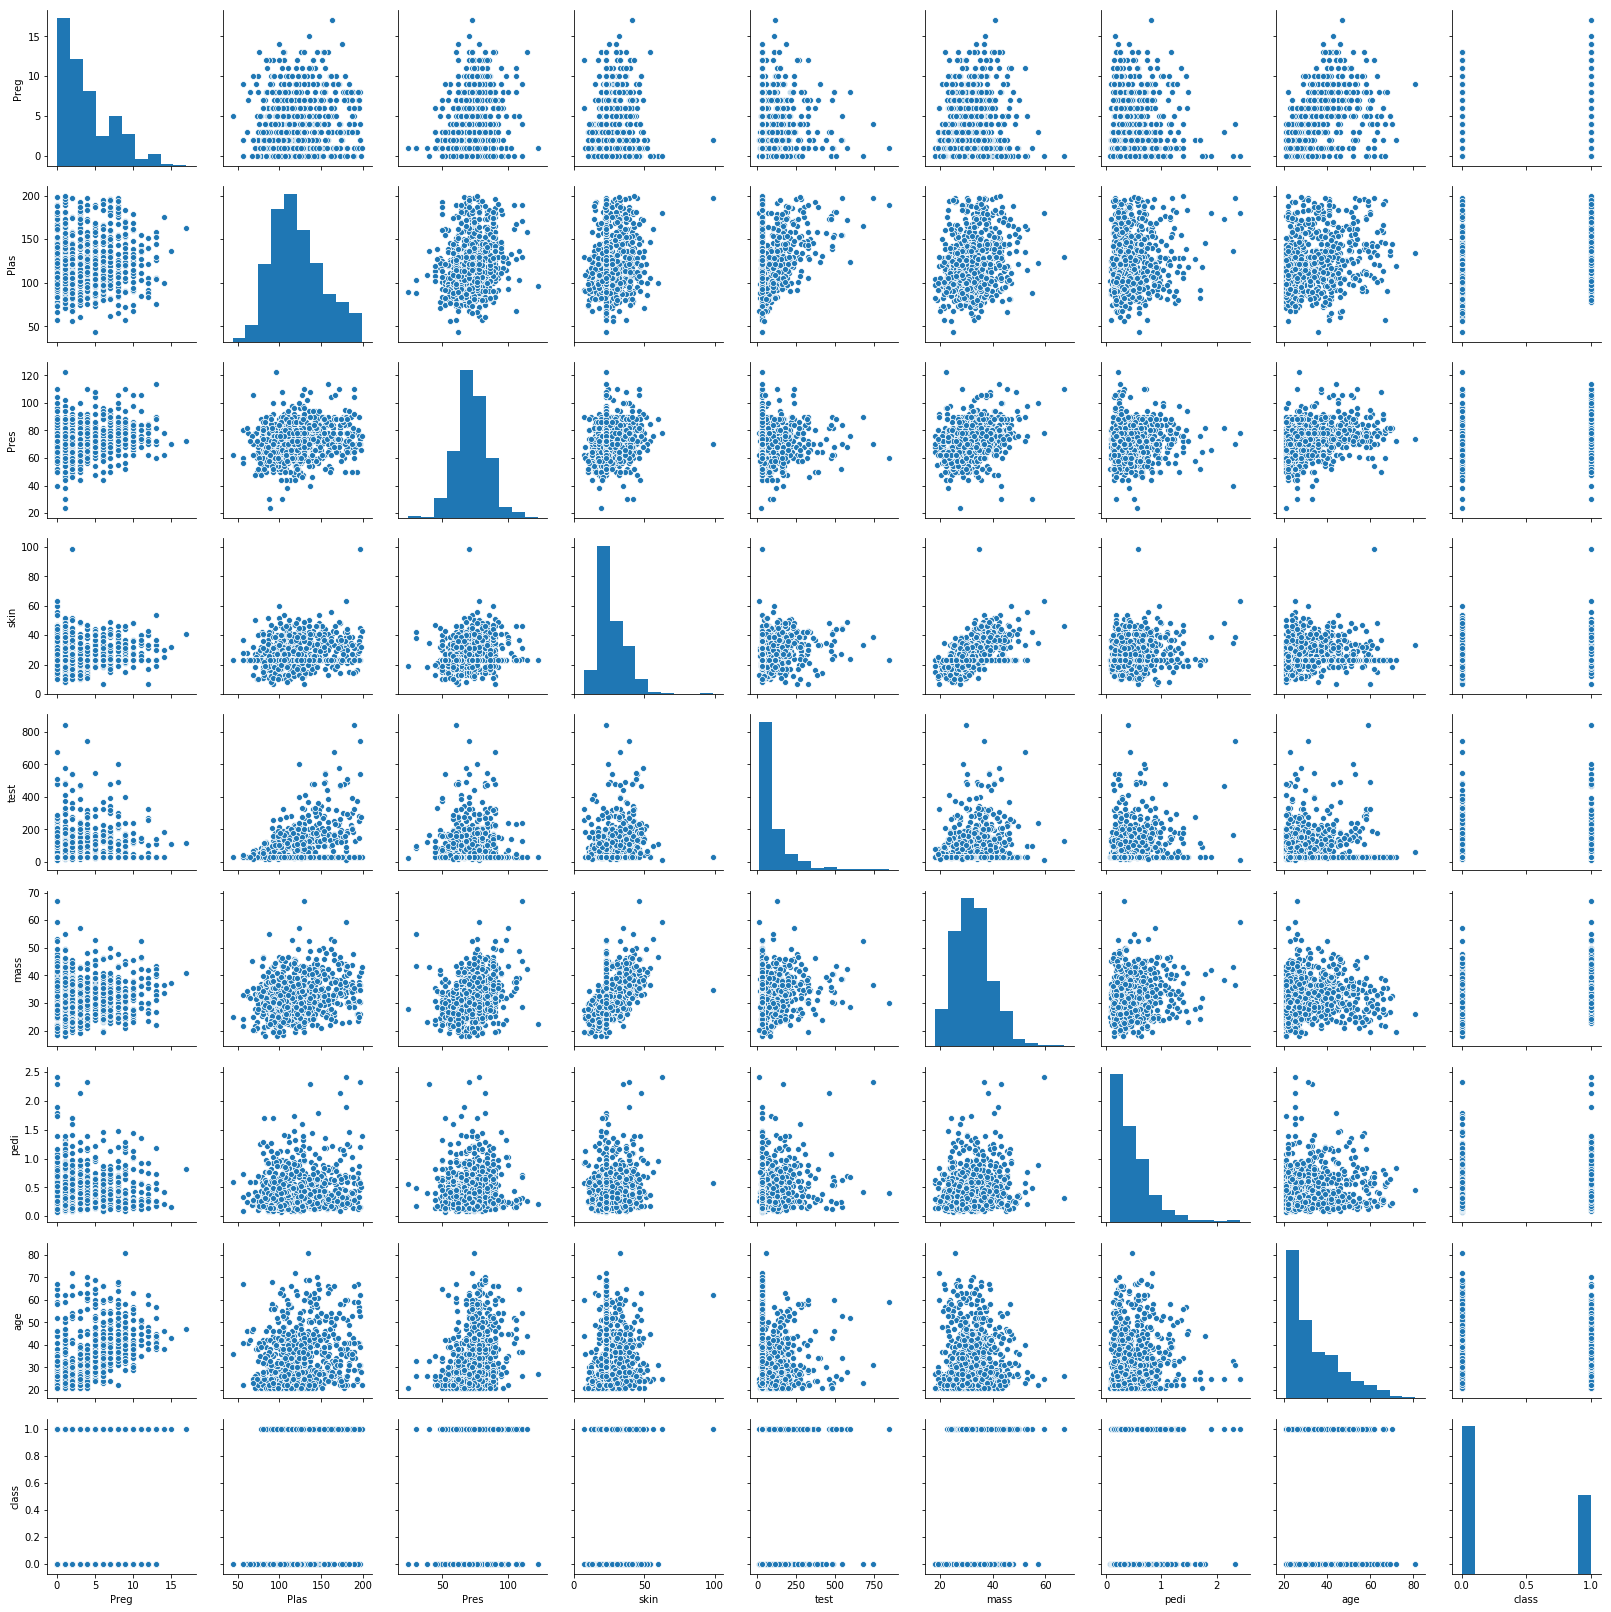

In [74]:
pima_df_attr = pima_df.iloc[:,0:9]

sns.pairplot(pima_df_attr)

Using the plot - infer the relationship between different variables

<html> <font color = Darkblue>
    <table>
        <head>
            <th><tr><th>Relation between</th><th>Comment</th></tr></th>
        </head>
        <body>
            <tr>
                <td>Preg vs Test</td>
                <td>Higher is the Preg value, lesser is the Test value. In other words they seem to have negative corelation.</td>
            </tr>
            <tr>
                <td>Preg vs Pedi</td>
                <td>Higher is the Preg value, lesser is the Pedi value. In other words they seem to have negative corelation.</td>
            </tr>
            <tr>
                <td>Plas vs Test</td>
                <td>Plas and Test look to have positive corelation.</td>
            </tr>
            <tr>
                <td>Skin vs Mass</td>
                <td>Skin and Mass are highly corelated.</td>
            </tr>
            <tr>
                <td>Age vs Pedi</td>
                <td>Pedi values seem to be restricted to lower values at higher age</td>
            </tr>
        </body>
    </table>
</font>
</html>

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [82]:
from sklearn.model_selection import train_test_split

X = X = pima_df.drop('class', axis=1)

y = pima_df[['class']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

#X_train.shape, X_test.shape

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [83]:
# from 26th July study

from sklearn.tree import DecisionTreeClassifier

pima_entropy = DecisionTreeClassifier(criterion = 'entropy' )

pima_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

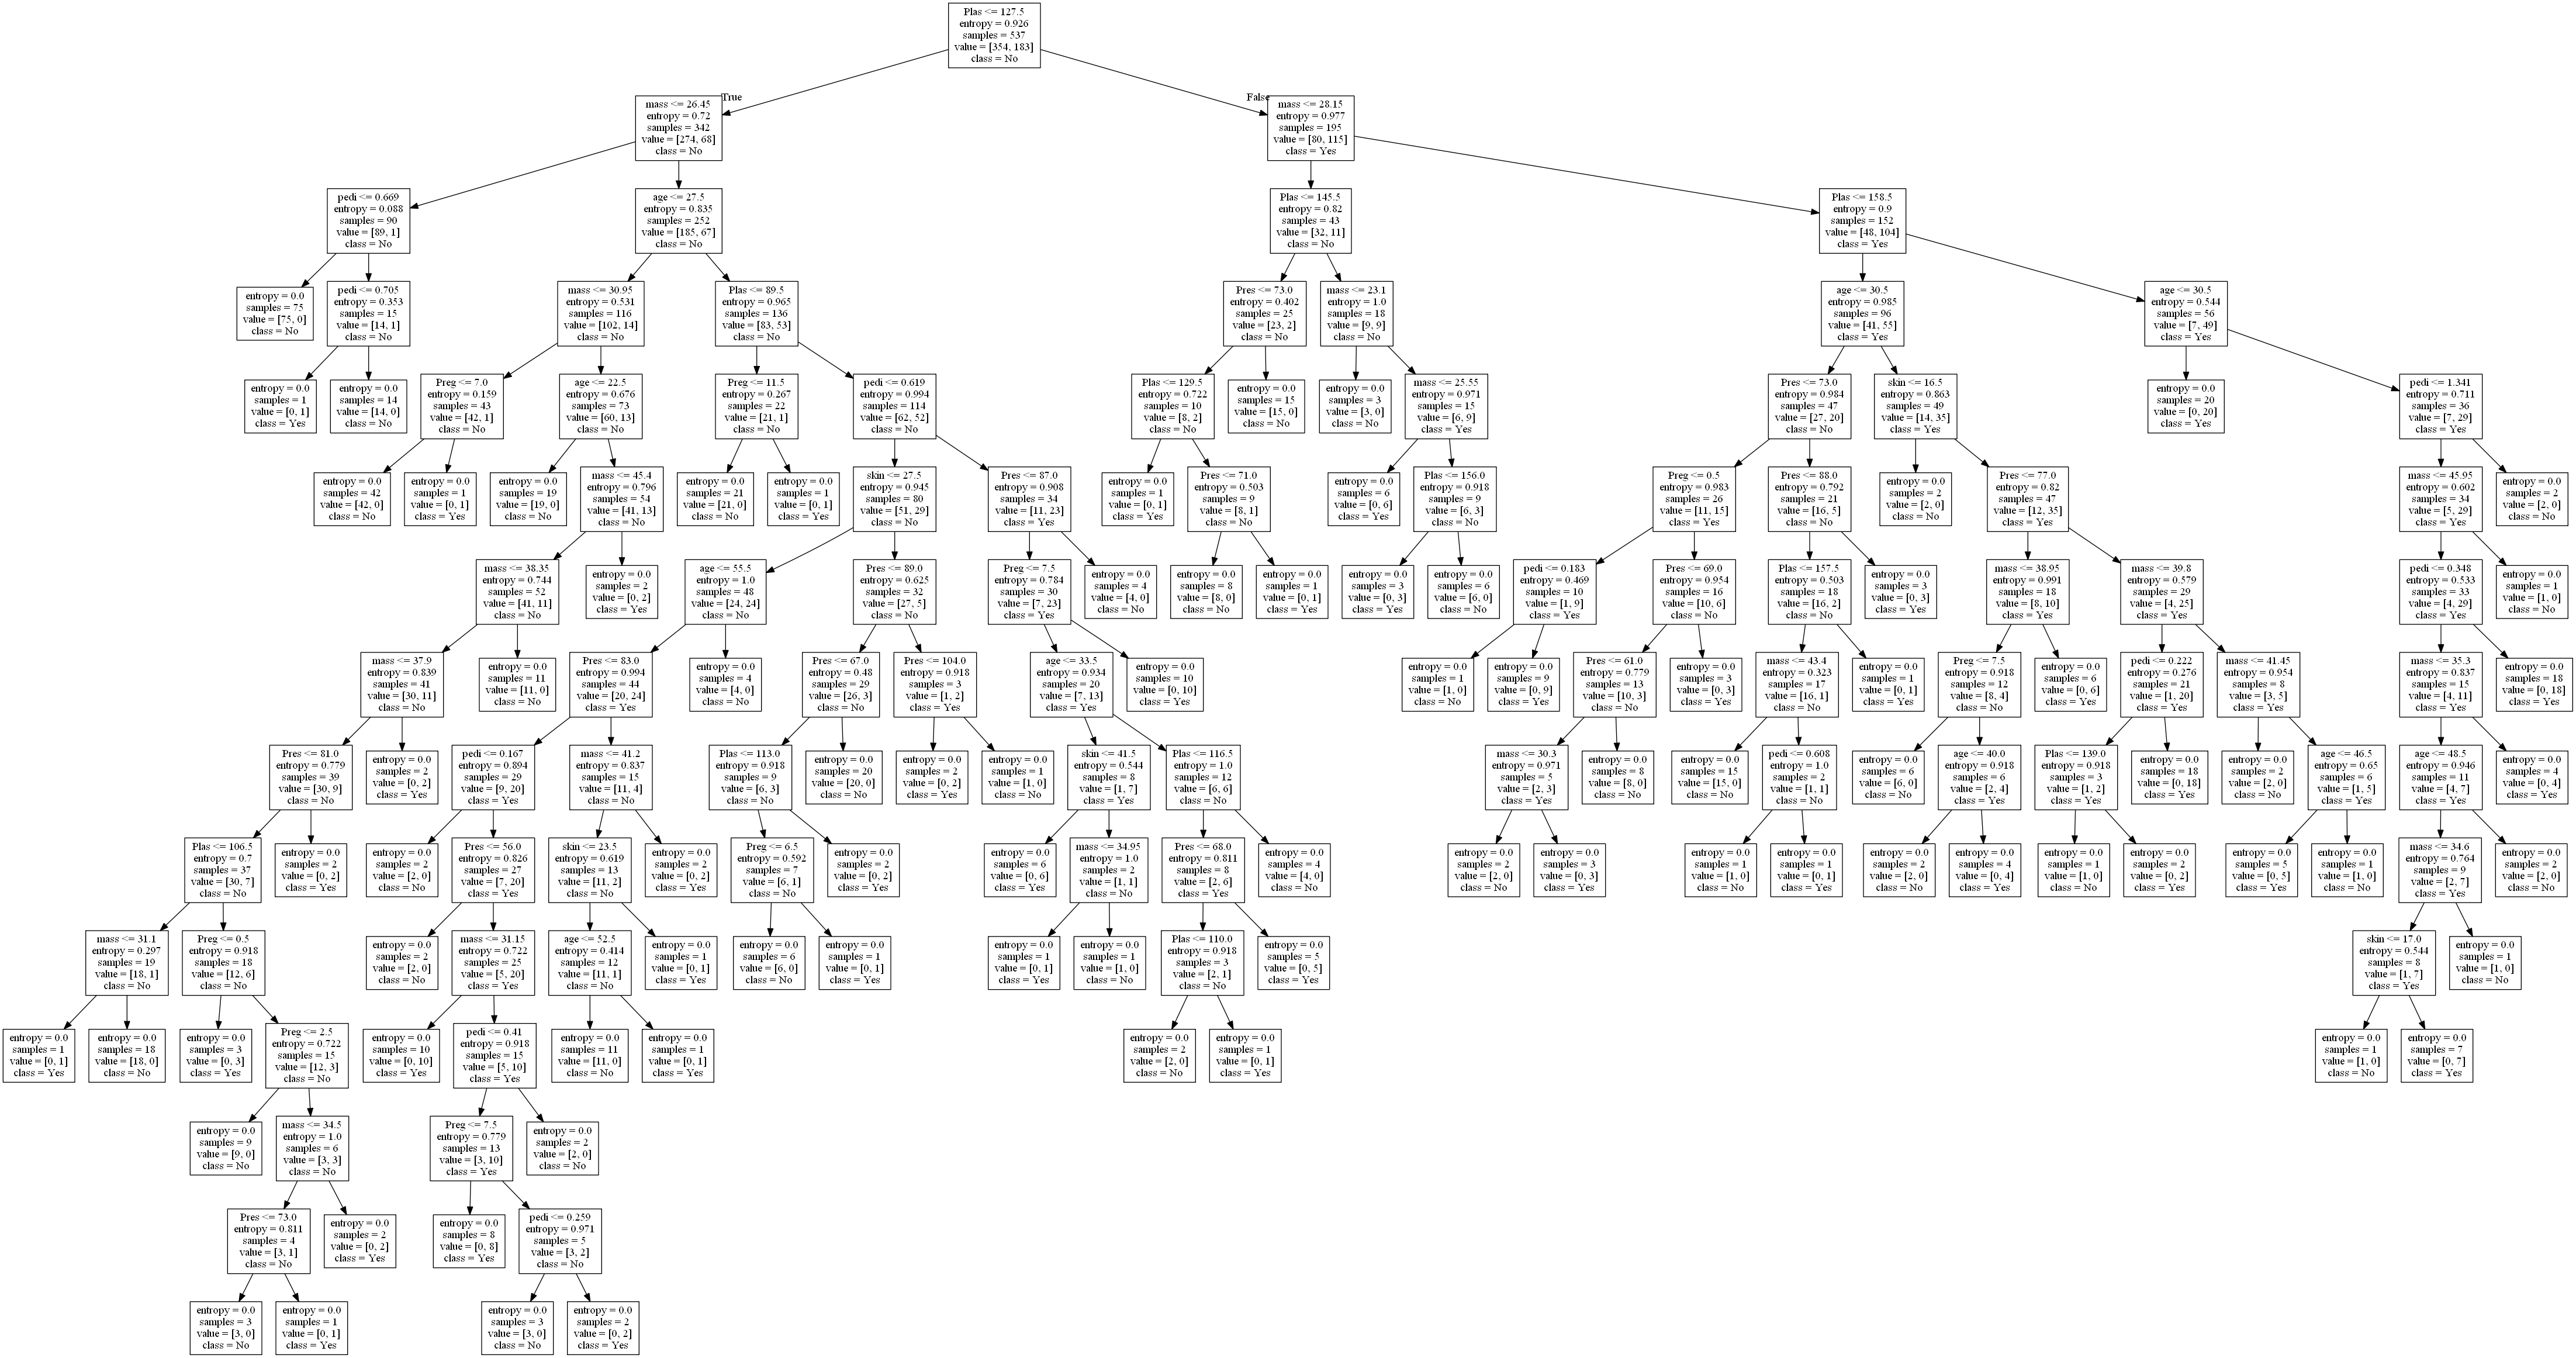

In [99]:
from sklearn import tree
from os import system
from IPython.display import Image

train_char_label = ['No', 'Yes']

Credit_Tree_File = open('d:\pima_tree01.dot','w')
dot_data = tree.export_graphviz(pima_entropy, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

system("dot -Tpng D:\pima_tree01.dot -o D:/pima_tree01.png")
Image("d:\pima_tree01.png")

# Q10 Print the accuracy of the model & print the confusion matrix 

In [100]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
#from sklearn.metrics import confusion_matrix

y_pred = pima_entropy.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred)*100)

print(metrics.confusion_matrix(y_test, y_pred))

72.2943722943723
[[112  34]
 [ 30  55]]


Print the feature importance of the decision model - Optional

In [101]:
print (pd.DataFrame(pima_entropy.feature_importances_, columns = ["Imp"], index = X_train.columns))

           Imp
Preg  0.097789
Plas  0.251170
Pres  0.147717
skin  0.042504
test  0.000000
mass  0.247112
pedi  0.094212
age   0.119496
